## Get dataset from sklearn

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
print(mnist['url'])

https://www.openml.org/d/554


In [3]:
dataset,labels = mnist['data'], mnist['target']
print("Data shape: " ,dataset.shape)
print("Labels shape: ",labels.shape)

Data shape:  (70000, 784)
Labels shape:  (70000,)


Label: 5


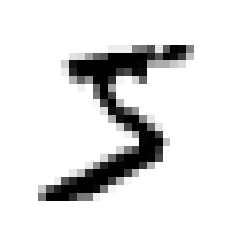

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")
    
some_digit = dataset[0]
plot_digit(some_digit)

print("Label:", labels[0])

In [5]:
import numpy as np
labels = labels.astype(np.uint8)

In [6]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

## create a test set & train set

In [7]:
data_train,  data_test  = dataset[:60000], dataset[60000:]
label_train, label_test = labels[:60000],  labels[60000:]

Label: [5 0 4 1 9]


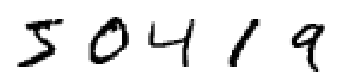

In [8]:
plot_digits(data_train[0:5])
print('Label:', label_train[0:5])

Label: [7 2 1 0 4]


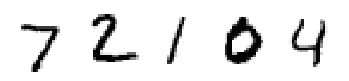

In [9]:
plot_digits(data_test[0:5])
print('Label:', label_test[0:5])

## shuffle the data

In [10]:
from numpy.random import permutation

shuffle_index = permutation(60000)# get random order of 1~60000
data_train,label_train = data_train[shuffle_index], label_train[shuffle_index]

Label: [5 5 3 3 7]


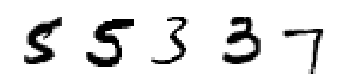

In [11]:
plot_digits(data_train[0:5])
print('Label:', label_train[0:5])

[ True  True False False False False False False False]


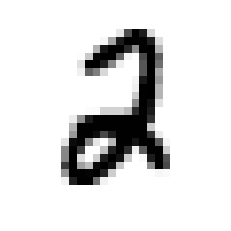

In [12]:
# True for all 5's, False for all other digits
label_train_5 = (label_train == 5)
label_test_5  = (label_test == 5)

print(label_train_5[0:9])
plot_digit(data_train[6])

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000)
sgd_clf.fit(X=data_train,y=label_train_5)# X-Training data, y-Target values

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
some_digit = data_train[6] # we know this is 5
sgd_clf.predict([some_digit])

array([False])

In [15]:
some_digit = data_train[0] # we know this is NOT 5
sgd_clf.predict([some_digit])

array([ True])

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator=sgd_clf,X=data_train,y=label_train_5,
               cv=3, scoring="accuracy")

array([0.95955, 0.9634 , 0.9608 ])

## Make predicitons

In [17]:
from sklearn.model_selection import cross_val_predict
label_train_pred = cross_val_predict(sgd_clf, data_train, label_train_5, cv=3)

## Get Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label_train_5, label_train_pred)

array([[54033,   546],
       [ 1609,  3812]], dtype=int64)

## Precision and Recall

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score = precision_score(label_train_5, label_train_pred)
recall_score = recall_score(label_train_5, label_train_pred)

print("Precision Score:" , precision_score)
print("Recall Score:" , recall_score)

Precision Score: 0.8747131711794401
Recall Score: 0.7031912931193507


## F1 Score

In [20]:
from sklearn.metrics import f1_score

fOneScore = f1_score(label_train_5, label_train_pred)
print("F1 Score:" , fOneScore)

F1 Score: 0.7796298189998978


## Decision Score

Label Score:  [-3367.46982426]


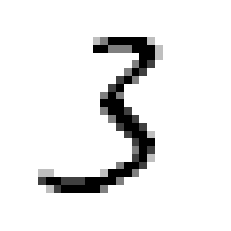

In [21]:
some_digit = data_train[2]
label_score = sgd_clf.decision_function([some_digit])
print("Label Score: ", label_score)
plot_digit(some_digit)

In [22]:
threshold = 0
label_some_digit_pred = (label_score > threshold)
print("label_some_digit_pred:",label_some_digit_pred)

label_some_digit_pred: [False]


In [23]:
threshold = 200000
label_some_digit_pred = (label_score > threshold)
print("label_some_digit_pred:",label_some_digit_pred)

label_some_digit_pred: [False]


In [24]:
label_scores = cross_val_predict(sgd_clf, data_train, label_train_5, cv=3,method="decision_function")
print(label_scores)

[  4003.79467185  22718.15227511 -10587.22475764 ...   6551.77853287
   1952.21694287 -18921.44369286]


In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(label_train_5, label_scores)

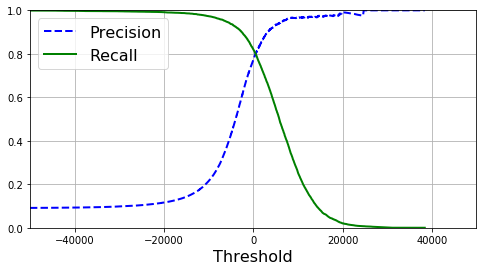

In [26]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])
    plt.grid()

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-50000, 50000])
plt.show()

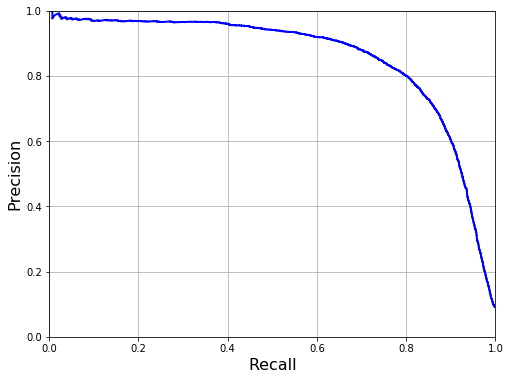

In [27]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid()
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

3218.693509878981


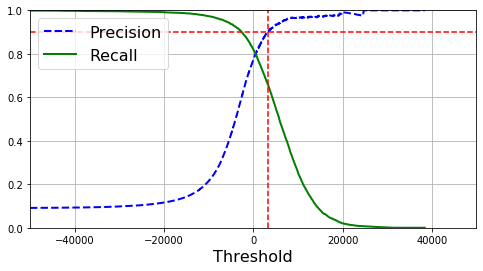

In [28]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-50000, 50000])

plt.axvline(x=threshold_90_precision,color='r', linestyle='--')
plt.axhline(y=0.9,color='r', linestyle='--')

plt.show()

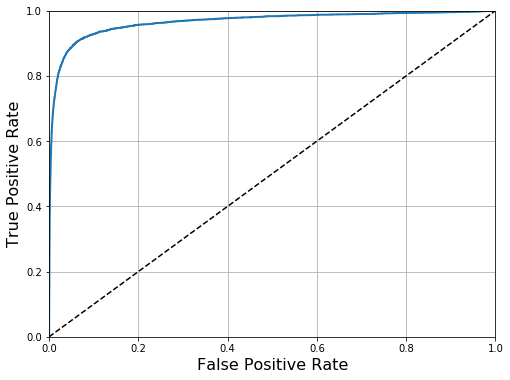

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(label_train_5, label_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.grid()
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(label_train_5, label_scores)

0.965828510085986

In [31]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
label_probas_forest = cross_val_predict(forest_clf, data_train, label_train_5, method="predict_proba")

In [32]:
label_scores_forest = label_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(label_train_5, label_scores_forest)

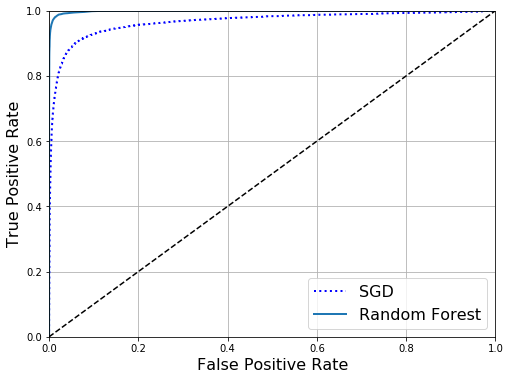

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.grid()
plt.show()

In [34]:
roc_auc_score(label_train_5, label_scores_forest)

0.9986381561406267

In [35]:
from sklearn.metrics import precision_score, recall_score

label_train_pred_forest = cross_val_predict(forest_clf, data_train, label_train_5)
precision_score = precision_score(label_train_5, label_train_pred_forest)
recall_score = recall_score(label_train_5, label_train_pred_forest)

print("Precision Score:" , precision_score)
print("Recall Score:" , recall_score)

Precision Score: 0.9904306220095693
Recall Score: 0.87825124515772
